In [1]:
from pathlib import Path
from hjelpefunksjonar import f2t

from get_u_delaunay import get_u
from f import f 
from check_collision import check_all_collisions
skalering = 1
%matplotlib widget
import pickle
import h5py

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# from check_collision import check_all_collisions
# from f import f
from rib import Rib

plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['mathtext.fontset'] = 'stix'

with open('data/rib50_Q40_1.pickle','rb') as fil:
    tri = pickle.load(fil)
del fil

def nullpluss(a):
    if round(a,1) == -0.0:
        return 0.0
    else:
        return a

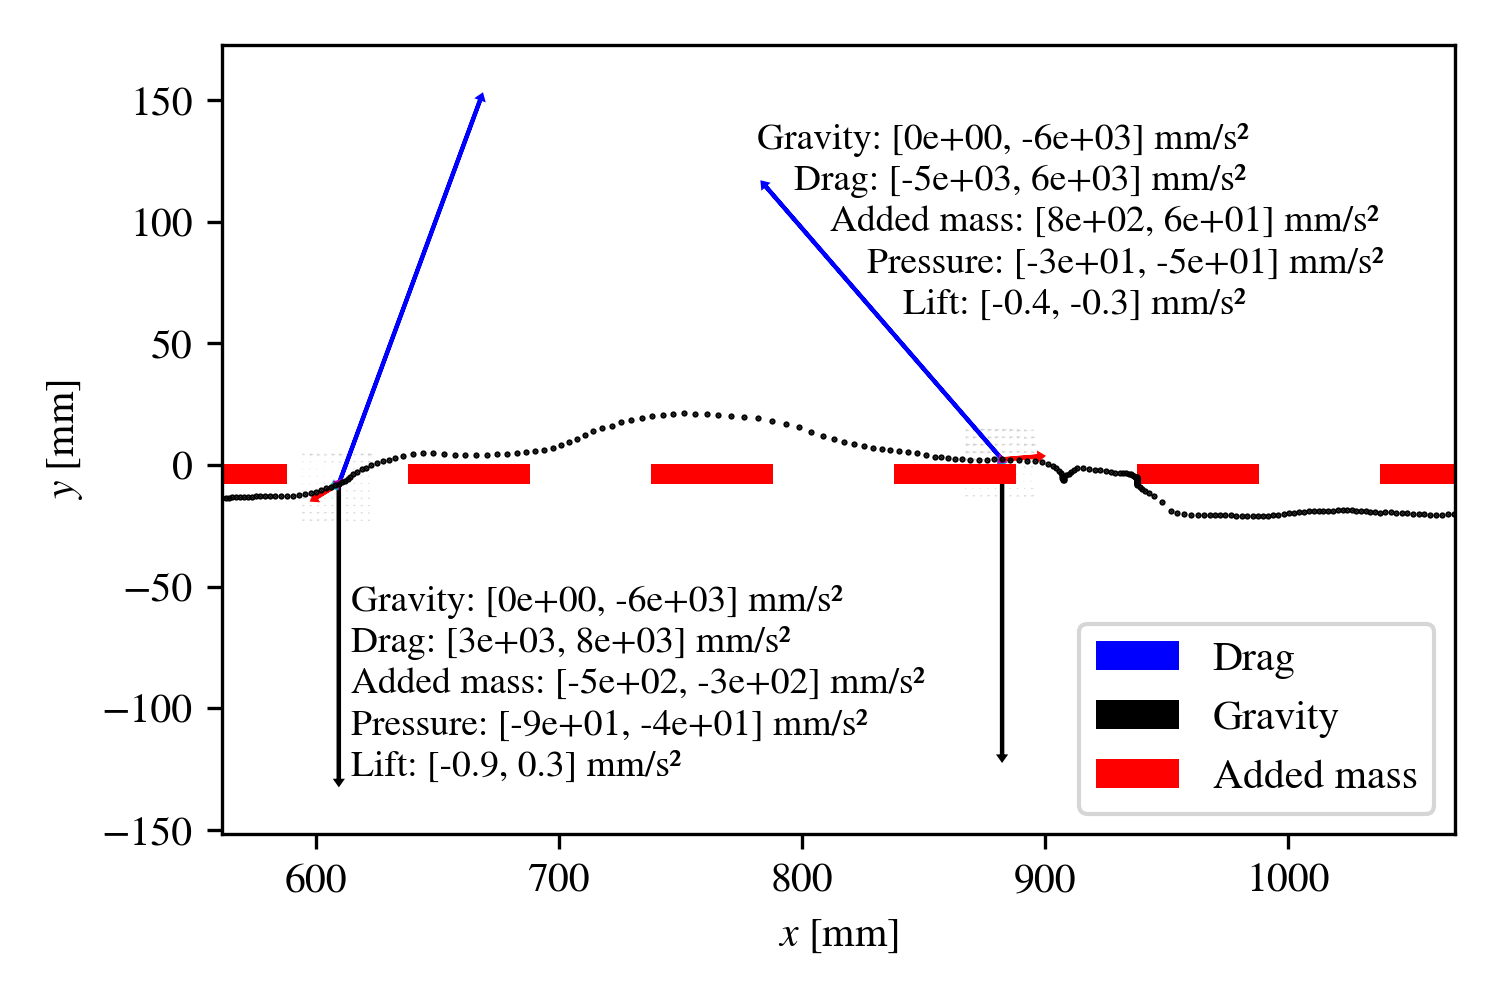

In [11]:
plt.close('all') 
partikkelfil= Path("./runs/rib50_Q40_1/RK45_RK45_50_[0.05, 0.06]_1_1e-02_linear_test25.10.22.pickle")
with open(partikkelfil, 'rb') as fil:
    partiklar = pickle.load(fil)
skalering = 1
myDPI = 300
with h5py.File(Path("data").joinpath(partikkelfil.parents[0].name+"_ribs").with_suffix(".hdf5"),'r') as fil:
    h5py_ribs = np.asarray(fil['ribs'])
del fil

ribs = []
for r in h5py_ribs:
    ribs.append(Rib(r))

x = (ribs[0].get_rib_middle()[0],ribs[1].get_rib_middle()[0])
x_width = x[1] - x[0]

fig, ax  = plt.subplots(figsize=(1500/myDPI,1000/myDPI),dpi=myDPI)

ax.axis('equal')

nedanfor = False

p = partiklar[0]

sti = p.sti_dict
init = int(sti['init_time'])
final = int(sti['final_time'])
plott_array = np.zeros((final+1-init,4))
krefter = []
for frame in range(init,final+1):
    plott_array[frame-init] = np.asarray(sti[frame]['position'])

def plott_krefter(i,p,plott_array,ax, plott_ved, start_hor, start_vert, høgre=0, ned=17):
   
    p.collision = check_all_collisions(p,np.asarray(sti[init+i]['position']),ribs)
    ut = 15
    lokal_x, lokal_y = np.meshgrid(np.arange(plott_array[i,0]-ut, plott_array[i,0]+ut, 3), np.arange(plott_array[i,1]-ut, plott_array[i,1]+ut, 3))
    lokal_fart,_,_ = get_u(f2t(init+i,skalering), np.asarray([lokal_x.ravel(),lokal_y.ravel(),np.zeros_like(lokal_x.ravel()),np.zeros_like(lokal_y.ravel())]), p, tri, ribs, p.collision, skalering)
    lokal_u = lokal_fart[0]
    lokal_v = lokal_fart[1]
    Q = ax.quiver(lokal_x, lokal_y, lokal_u, lokal_v, width=0.0008,scale=20000, color='lightgrey')
    # drag = drag_component, gravity = gravity_component, added_mass = added_mass_component - 0.5 * rho_self_density * dudt, pressure = pressure_component, lift_component = lift_component, dudt = dudt, dxdt=dxdt
    sti[init+i]['forces'] = f(f2t(init+i,skalering),np.asarray(sti[init+i]['position']).reshape(4,1),p,tri,ribs, skalering, get_u,True)
    pilskala = 0.02
    n=0
    for force,col in {'gravity':'k','drag':'b','added_mass':'r','pressure':'c','lift':'m'}.items():
        ax.arrow(plott_array[i,0], plott_array[i,1], float(sti[init+i]['forces'][force][0])*pilskala, float(sti[init+i]['forces'][force][1])*pilskala, width=.1, head_width=1.7, head_length=1.2, color=col)#, fc=col, ec=None)
        ax.annotate(f"{force.capitalize().replace('_',' ')}: [{nullpluss(float(sti[init+i]['forces'][force][0])):.1}, {nullpluss(float(sti[init+i]['forces'][force][1])):.1}] mm/s²", 
                    xy=(plott_array[i,0]+float(sti[init+i]['forces'][plott_ved][0])*pilskala+start_hor + n*høgre, plott_array[i,1]+ float(sti[init+i]['forces'][plott_ved][1])*pilskala-n*ned+start_vert) ,fontsize=9)
        n +=1
i = 155
plott_krefter(i, p, plott_array, ax, 'gravity', 5.,70.)
i = 230
plott_krefter(i, p, plott_array, ax, 'drag', -3., 15., 15.)

# p.collision = check_all_collisions(p,np.asarray(sti[init+i]['position']),ribs)
# ut = 15
# lokal_x, lokal_y = np.meshgrid(np.arange(plott_array[i,0]-ut, plott_array[i,0]+ut, 3), np.arange(plott_array[i,1]-ut, plott_array[i,1]+ut, 3))
# lokal_fart,_,_ = get_u(f2t(init+i,skalering), np.asarray([lokal_x.ravel(),lokal_y.ravel(),np.zeros_like(lokal_x.ravel()),np.zeros_like(lokal_y.ravel())]), p, tri, ribs, p.collision, skalering)
# lokal_u = lokal_fart[0]
# lokal_v = lokal_fart[1]
# Q = ax.quiver(lokal_x, lokal_y, lokal_u, lokal_v, width=0.0008,scale=20000, color='lightgrey')
# # drag = drag_component, gravity = gravity_component, added_mass = added_mass_component - 0.5 * rho_self_density * dudt, pressure = pressure_component, lift_component = lift_component, dudt = dudt, dxdt=dxdt
# sti[init+i]['forces'] = f(f2t(init+i,skalering),np.asarray(sti[init+i]['position']).reshape(4,1),p,tri,ribs, skalering, get_u,True)
# pilskala = 0.02
# n=0
# for force,col in {'gravity':'k','drag':'b','added_mass':'r','pressure':'c','lift':'m'}.items():
#     ax.arrow(plott_array[i,0], plott_array[i,1], float(sti[init+i]['forces'][force][0])*pilskala, float(sti[init+i]['forces'][force][1])*pilskala, width=.1, head_width=1.7, head_length=1.2, color=col)#, fc=col, ec=None)
#     ax.annotate(f"{force.capitalize().replace('_',' ')}: [{nullpluss(float(sti[init+i]['forces'][force][0])):.1}, {nullpluss(float(sti[init+i]['forces'][force][1])):.1}] mm/s²", 
#                 xy=(plott_array[i,0]+float(sti[init+i]['forces']['drag'][0])*pilskala -3.+n*15., plott_array[i,1]+ float(sti[init+i]['forces']['drag'][1])*pilskala-n*17.+15.) ,fontsize=9)
#     n +=1

ax.add_patch(Polygon(ribs[0].vertices, facecolor='red'))
for i in range(int(5000/x_width)):
    ax.add_patch(Polygon(ribs[1].vertices+ i* np.asarray([x_width, 0]), facecolor='red'))
ax.plot(plott_array[:,0], plott_array[:,1], 'ko', markersize=0.5,linewidth=0.5, label=p.index)
# ax.set_title(f"{partikkelfil.parent.name} {partikkelfil.stem} p_{p.index}")
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r'$y$ [mm]')
ax.set_xlim(570,1060)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor='blue', label='Drag'),
                  Patch(facecolor='black', label='Gravity'),
                  Patch(facecolor='red', label='Added mass'),]

ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()

In [3]:
i = 514
#sti[init+514]['forces']
f(f2t(init+i,skalering),np.asarray(sti[init+i]['position']).reshape(4,1),p,tri,ribs, skalering, get_u,True)

{'drag': array([[-105.31031731],
        [6064.60361469]]),
 'gravity': array([[   -0.        ],
        [-6108.11320755]]),
 'added_mass': array([[20.98288858],
        [ 7.56734124]]),
 'pressure': array([[16.28258829],
        [ 2.52387023]]),
 'lift': array([[-0.01561003],
        [-0.00027106]]),
 'dudt': array([[-68.06045047],
        [-33.41865246]]),
 'dxdt': array([[31.03812678],
        [-2.03592064]])}

In [4]:
get_u(f2t(init+i,skalering), np.asarray(sti[init+i]['position']).reshape(4,1), p, tri, ribs, p.collision, skalering)

(array([[31.0057732 ],
        [-0.17274457]]),
 array([[43.14885898],
        [ 6.6882561 ]]),
 array([[[30.96744223],
         [31.04410416]],
 
        [[-0.17538374],
         [-0.17010541]]]))

In [5]:
np.asarray(sti[init+i]['position']).reshape(4,1)

array([[1419.116267  ],
       [ -14.76457344],
       [  31.03812678],
       [  -2.03592064]])

In [6]:
particle = p
x = np.asarray(sti[init+i]['position']).reshape(4,1)
t = f2t(init+i,skalering)
from hjelpefunksjonar import norm
from constants import g, ρ, ν
g = np.array([[0], [g]]) # mm/s^2 = 9.81 m/s^2

addedmass = particle.addedmass
collision = particle.collision 
number_of_vectors = x.shape[1]
try:
    µ = collision['rib'].µ # friksjonskoeffisenten
except KeyError:
    µ = 0.5

dxdt = x[2:]

U_f, dudt_material, U_top_bottom = get_u(t, x, particle, tri, ribs, collision= collision, skalering=skalering)

vel = U_f - dxdt # relativ snøggleik
Re = np.hypot(vel[0],vel[1]) * particle.diameter / ν

try:
        cd = ( (32 / (Re+.001))**(1/1.5) + 1)**1.5
except (ZeroDivisionError, FloatingPointError):
        cd = 2e4
rho_self_density = ρ / particle.density

drag_component =  3/4 * cd / particle.diameter * rho_self_density * np.linalg.norm(vel,axis=0)*vel
gravity_component = (rho_self_density - 1) * g
added_mass_component = 0.5 * rho_self_density * dudt_material 
pressure_component = rho_self_density * dudt_material
if np.all(dudt_material == 0.0 ):
    addedmass = False

if np.all(U_top_bottom == 0.0):
    lift_component = np.zeros((2,number_of_vectors))
else:
    rotation_matrix_sign = np.sign(np.diff(np.linalg.norm(U_top_bottom- x[2:,None],axis=0),axis=0)).item(0) # Rotasjonsmatrisa skal vera [[0,-1],[1,0]] om U_top > U_bottom, og [[0,1],[-1,0]] om U_top < U_bottom. rotation_matrix_sign > 0 om U_top < U_bottom.
    lift_component = 3/4 * 0.2 / particle.diameter * rho_self_density * -np.diff(np.square(np.hypot((U_top_bottom- x[2:,None])[0], (U_top_bottom- x[2:,None])[1])),axis=0) * (np.array([[0, rotation_matrix_sign],[-rotation_matrix_sign, 0]]) @ norm(drag_component) )

divisor = 1 + 0.5 * rho_self_density * addedmass
dudt = (drag_component + gravity_component + added_mass_component + pressure_component + lift_component ) / divisor

In [7]:
U_f,dxdt

(array([[31.0057732 ],
        [-0.17274457]]),
 array([[31.03812678],
        [-2.03592064]]))

In [8]:
print(init,final)

867 1780


In [9]:
list(range(93,170,50))

[93, 143]